In [2]:
import numpy as np

from astropy import units as u
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

imp = u.imperial
faring_height = (82.7 * imp.inch).cgs
faring_radius = (13.95*imp.inch).cgs

fudge = 5*u.cm
faring_diameter = 2 * faring_radius
bus_height = 60 * u.cm
fudge = 5*u.cm


from astroduet.config import Telescope
duet = Telescope()



In [3]:
def extra_length(epd, earth_avoid_angle, **kwargs):
    from astropy import units as u
    import numpy as np

    diag = kwargs.pop('diag', False)
    fov = kwargs.pop('fov', 4.0*u.deg)
    sun_avoid_angle = kwargs.pop('sun_avoid_angle', 45*u.deg)
    
    h = epd / np.tan(earth_avoid_angle)
    h1 = (np.tan(fov) * epd) / (np.tan(earth_avoid_angle) * (np.tan(earth_avoid_angle) - np.tan(fov)))

    baffle_height = h + h1

    epd_delta = baffle_height * np.tan(fov)
    baffle_opening = epd+2*epd_delta

    sh0 = (baffle_opening) / np.tan(sun_avoid_angle)
    sh1 = (np.tan(fov) * baffle_opening) / (np.tan(sun_avoid_angle) * (np.tan(sun_avoid_angle) - np.tan(fov)))
    
    sun_shield = sh0 + sh1
    sun_shield_diameter = baffle_opening + 2 * sun_shield*np.tan(fov)
    
    if diag:
        print('Earth baffle diameter at bottom: {}'.format(epd))
        print('Earth baffle height for {} earth avoidance is {:.2f}'.format(earth_avoid_angle, baffle_height))
        print('Earth baffle diameter at top: {}'.format(baffle_opening))
        print('Sun scarf height for {} sun avoidance is {:.2f}'.format(sun_avoid_angle, sun_shield))
        print('Sun scarf "diameter" at top: {}'.format(sun_shield_diameter))
        print('Length of baffle + sun-shield {:.2f}'.format(sun_shield + baffle_height))
        
    return sun_shield+baffle_height

    


In [4]:

# Margin around EPD opening:

epd = duet.EPD + 10*u.mm

# Margin below Doug's sun-shield length
length_to_match = 773 * u.mm - 13*u.mm

# Inputs:
sun_avoid = 45*u.deg
fov = 4*u.deg

for angle in np.arange(40, 30, -0.1):
    earth_avoid_angle = angle*u.deg
    lengths = extra_length(epd, earth_avoid_angle, fov=fov, sun_avoid_angle=sun_avoid)
    if lengths > length_to_match:
        break
    
print('Earth Avoidance Angle we can fit: {}'.format(earth_avoid_angle))
lengths = extra_length(epd, earth_avoid_angle, fov=fov, sun_avoid_angle=sun_avoid, diag=True)




Earth Avoidance Angle we can fit: 36.099999999999945 deg
Earth baffle diameter at bottom: 27.0 cm
Earth baffle height for 36.099999999999945 deg earth avoidance is 40.95 cm
Earth baffle diameter at top: 32.72748304921962 cm
Sun scarf height for 45.0 deg sun avoidance is 35.19 cm
Sun scarf "diameter" at top: 37.648662547683365 cm
Length of baffle + sun-shield 76.14 cm


In [17]:
scale = 2/ 27
height = 36.099999999999945 * scale
print(height)
top_diam = 32.72748304921962 * scale
print(top_diam)
scarf_height = 35.19 * scale
print(scarf_height)
scarf_diameter = 37.648662547683365 * scale
print(scarf_diameter)
print(77.3 * scale)

2.6740740740740696
2.424258003645898
2.6066666666666665
2.788789818346916
5.725925925925925


In [16]:
# Margin around EPD opening:

epd = duet.EPD + 10*u.mm

# Margin below Doug's sun-shield length
length_to_match = 773 * u.mm - 13*u.mm

# Inputs:
sun_avoid = 45*u.deg
fov = 4*u.deg

angle = np.arange(30, 50, 0.5)
earth_avoid_angle = angle*u.deg
lengths = extra_length(epd, earth_avoid_angle, fov=fov, sun_avoid_angle=sun_avoid)
    
# print('Earth Avoidance Angle we can fit: {}'.format(earth_avoid_angle))
# lengths = extra_length(epd, earth_avoid_angle, fov=fov, sun_avoid_angle=sun_avoid, diag=True)





[763.33055399 694.10946691 624.25137871] mm


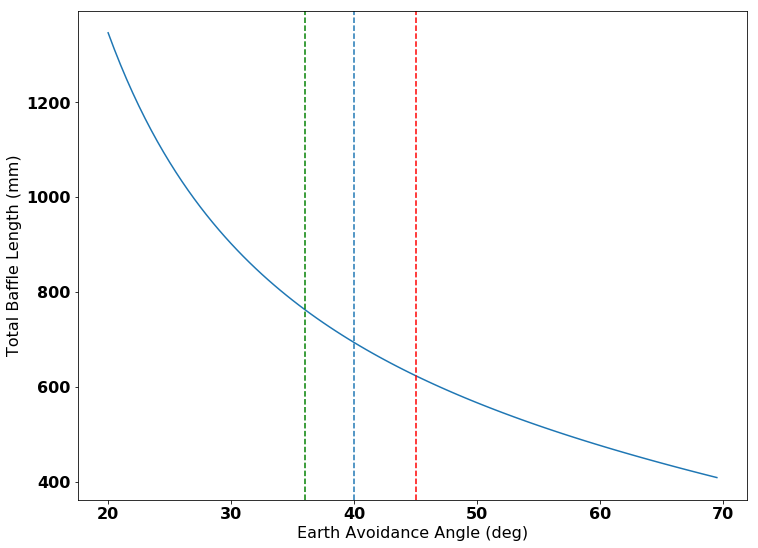

In [38]:
# Margin around EPD opening:

epd = duet.EPD + 10*u.mm

# Margin below Doug's sun-shield length
length_to_match = 773 * u.mm - 13*u.mm

# Inputs:
sun_avoid = 45*u.deg
fov = 4*u.deg

angle = np.arange(20, 70, 0.5)
earth_avoid_angle = angle*u.deg
lengths = extra_length(epd, earth_avoid_angle, fov=fov, sun_avoid_angle=sun_avoid)
    
# print('Earth Avoidance Angle we can fit: {}'.format(earth_avoid_angle))
# lengths = extra_length(epd, earth_avoid_angle, fov=fov, sun_avoid_angle=sun_avoid, diag=True)





f = plt.figure(figsize=[12, 9])
plt.plot(earth_avoid_angle, lengths*10.)
plt.xlabel('Earth Avoidance Angle (deg)', fontsize=16)
plt.xticks(fontsize=16)

plt.ylabel('Total Baffle Length (mm)', fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=45., linestyle = '--', c = 'r')
plt.axvline(x=40., linestyle = '--')
plt.axvline(x=36., linestyle = '--', c='g')

angle = [36, 40, 45]
earth_avoid_angle = angle*u.deg
lengths = extra_length(epd, earth_avoid_angle, fov=fov, sun_avoid_angle=sun_avoid)
print(lengths.to(u.mm))
